In [6]:
from PIL import Image, ImageDraw, ImageFont, ImageChops
from skimage.io._plugins.pil_plugin import pil_to_ndarray
from skimage.io._plugins.pil_plugin import ndarray_to_pil
import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity
import copy

In [7]:
show = True

In [8]:
y_train = Image.open('train.jpg').convert('L').crop((0, 0, 256, 256))
y_test = Image.open('test.jpg').convert('L').crop((0, 0, 256, 256))

if show:
    y_train.save('y_train.png', 'PNG')
    y_test.save('y_test.png', 'PNG')

# Building and saving y_test_missing
y_test_missing = copy.deepcopy(y_test)
draw = ImageDraw.Draw(y_test_missing)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype('Abandoned.ttf', size=12)
draw.fontmode = '1'
# draw.text((x, y),"Sample Text",(r,g,b))
draw.text((10, 10),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 35),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 60),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 85),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 110),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 135),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 160),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 185),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 210),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 235),"This Homework is cooly coooooooool",(255), font=font)
draw.text((10, 260),"This Homework is cooly coooooooool",(255), font=font)
y_test_missing.save('y_test_missing.png')

#Building and saving the mask
mask = ImageChops.difference(y_test_missing, y_test)
mask = np.array(pil_to_ndarray(mask) <= 0.1, dtype=int)
mask_img = mask * 255
mask = ndarray_to_pil(mask)
mask_img = ndarray_to_pil(mask_img)
if show:
    mask_img.save('mask.png', 'PNG')

/home/ohayonguy/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  return convert(image, np.uint8, force_copy)
/home/ohayonguy/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return convert(image, np.uint8, force_copy)


In [9]:
psnr_y_test_y_test_missing = peak_signal_noise_ratio(pil_to_ndarray(y_test), pil_to_ndarray(y_test_missing))
ssim_y_test_y_test_missing = structural_similarity(pil_to_ndarray(y_test), pil_to_ndarray(y_test_missing))
print(psnr_y_test_y_test_missing)
print(ssim_y_test_y_test_missing)
print('\n')

"""
plt.imshow(y_train, cmap='gray')
plt.show()
plt.imshow(y_test, cmap='gray')
plt.show()
plt.imshow(y_test_missing, cmap='gray')
plt.show()
plt.imshow(mask, cmap='gray')
plt.show()"""

15.25291392854199
0.6323040957575629




"\nplt.imshow(y_train, cmap='gray')\nplt.show()\nplt.imshow(y_test, cmap='gray')\nplt.show()\nplt.imshow(y_test_missing, cmap='gray')\nplt.show()\nplt.imshow(mask, cmap='gray')\nplt.show()"

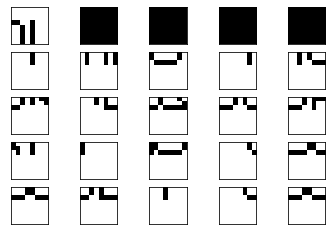

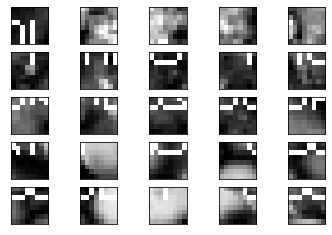

In [10]:
#Create and plot patches
y_test_patches = np.array([pil_to_ndarray(y_test_missing)[i:i + 8, j:j + 8] for i in range(0, 256, 8) for j in range(0, 256, 8)])
mask_patches = np.array([pil_to_ndarray(mask)[i:i+8, j:j+8] for i in range(0, 256, 8) for j in range(0, 256, 8)])

plt.figure(1)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mask_patches[i+60], cmap='gray')
if show:
    plt.show()

plt.figure(2)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(y_test_patches[i + 60], cmap='gray')
if show:
    plt.show()

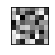

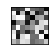

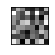

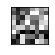

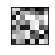

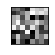

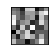

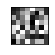

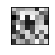

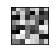

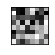

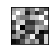

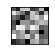

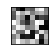

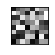

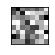

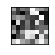

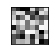

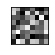

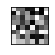

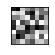

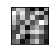

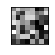

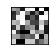

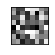

'\nmask_patches_flatten = [0] * 1024\nfor i in range(1024):\n    mask_patches_flatten[i] = [mask_patches[i][k][j] for k in range(8) for j in range(8)]\n\nmask_patches_flatten = np.array(mask_patches_flatten)\nprint(random_patches.shape)\nprint(mask_patches_flatten.shape)'

In [11]:
#Random dictionary creation and plot

num_of_atoms = 512
random_patches = np.random.random((64, num_of_atoms))

if show:
    plt.figure(3)
    num_of_atoms_to_show = 25
    for i in range(num_of_atoms_to_show):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(random_patches[:,i].reshape(8, 8), cmap='gray')
        plt.show()
        

for i in range(num_of_atoms):
    random_patches[:,i] = random_patches[:,i] / np.linalg.norm(random_patches[:,i])
'''
mask_patches_flatten = [0] * 1024
for i in range(1024):
    mask_patches_flatten[i] = [mask_patches[i][k][j] for k in range(8) for j in range(8)]

mask_patches_flatten = np.array(mask_patches_flatten)
print(random_patches.shape)
print(mask_patches_flatten.shape)'''

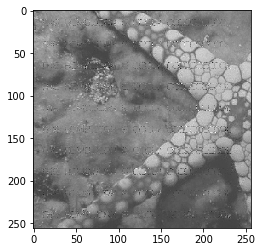

In [21]:
#OMP
from sklearn.linear_model import OrthogonalMatchingPursuit
def OMP_reconstruction(mask_patches, 
                      y_patches, dictionary, n_nonzero_coefs=20, num_of_patches=1024,
                       result_img_shape=(256, 256)):
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs, fit_intercept=False)
    reconstructed_y = np.zeros(shape=result_img_shape)
    for patch_index in range(num_of_patches):
        patch_col = int(patch_index % 32)
        patch_row = int(patch_index / 32)
        bool_mask = mask_patches[patch_index].flatten().astype(bool)
        y_relevant_info_patch = y_patches[patch_index].flatten()[bool_mask]
        omp.fit(dictionary[bool_mask,:], y_relevant_info_patch)
        coef = omp.coef_
        y_predict = dictionary.dot(coef)
        reconstructed_y[patch_row * 8:patch_row * 8 + 8, 
                             patch_col * 8:patch_col * 8 + 8] = y_predict.reshape(8, 8)
    return reconstructed_y

reconstructed_y = OMP_reconstruction(mask_patches, y_test_patches, random_patches)
plt.imshow(reconstructed_y, cmap='gray')
plt.show()

In [22]:
psnr_y_test_y_test_missing = peak_signal_noise_ratio(pil_to_ndarray(y_test), reconstructed_y)
ssim_y_test_y_test_missing = structural_similarity(pil_to_ndarray(y_test), reconstructed_y)
print(psnr_y_test_y_test_missing)
print(ssim_y_test_y_test_missing)
print('\n')

24.447593104845332
0.8069261470779783




/home/ohayonguy/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """Entry point for launching an IPython kernel.
/home/ohayonguy/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


In [23]:
y_train_patches = np.array([pil_to_ndarray(y_train)[i:i + 8, j:j + 8] for i in range(0, 256, 8) for j in range(0, 256, 8)]).reshape(1024,-1)
print(y_train_patches.shape)

(1024, 64)


In [127]:
# n_samples = number of pixels
# n_features = number of atoms
# n_targets = number of training examples
# targets shape=(n_samples, n_targets)
def KSVD(targets, n_samples=64, max_iter=15, n_nonzero_coefs=20, 
         thres=1e-6, n_features=512):
    
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs, fit_intercept=False)
    D = np.random.randn(n_samples, n_features)

    for i in range(max_iter):
        omp.fit(D, targets)
        coef = omp.coef_.T #shape=(n_features, n_targets)
        y_predict = D.dot(coef) #shape=(n_samples, n_targets)
        err = np.linalg.norm(targets - y_predict)
        if err < thres:
            break
        # Update dictionary
        for j in range(n_features):
            I = coef[j, :] != 0
            if np.sum(I) == 0:
                continue
            E_k = targets[:, I] - D.dot(coef[:, I]) + np.outer(D[:, j], coef[j, I])
            U, S, V = np.linalg.svd(E_k)
            D[:, j] = U[:, 0]
            coef[j, I] = S[0] * V[:, 0]
            
    #Normalize D:
    D /= np.linalg.norm(D, axis=0)[np.newaxis, :]
    return D

In [128]:
D = KSVD(y_train_patches.T)

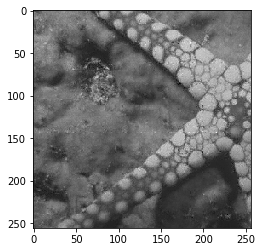

"\nreconstructed_y_test = np.zeros(shape=(256,256))\nfor patch_index in range(1024):\n    patch_col = int(patch_index % 32)\n    patch_row = int(patch_index / 32)\n    bool_mask = mask_patches[patch_index].flatten().astype(bool)\n    y_test_relevant_info_patch = y_test_patches[patch_index].flatten()[bool_mask]\n    omp.fit(dictionary[bool_mask,:], y_test_relevant_info_patch)\n    coef = omp.coef_\n    y_predict = dictionary.dot(coef)\n    reconstructed_y_test[patch_row * 8:patch_row * 8 + 8, \n                         patch_col * 8:patch_col * 8 + 8] = y_predict.reshape(8, 8)\n\nplt.imshow(reconstructed_y_test, cmap='gray')\nplt.show()\n"

In [129]:
reconstructed_y = OMP_reconstruction(mask_patches, y_test_patches, D)
plt.imshow(reconstructed_y, cmap='gray')
plt.show()
'''
reconstructed_y_test = np.zeros(shape=(256,256))
for patch_index in range(1024):
    patch_col = int(patch_index % 32)
    patch_row = int(patch_index / 32)
    bool_mask = mask_patches[patch_index].flatten().astype(bool)
    y_test_relevant_info_patch = y_test_patches[patch_index].flatten()[bool_mask]
    omp.fit(dictionary[bool_mask,:], y_test_relevant_info_patch)
    coef = omp.coef_
    y_predict = dictionary.dot(coef)
    reconstructed_y_test[patch_row * 8:patch_row * 8 + 8, 
                         patch_col * 8:patch_col * 8 + 8] = y_predict.reshape(8, 8)

plt.imshow(reconstructed_y_test, cmap='gray')
plt.show()
'''

In [130]:
psnr_y_test_y_test_missing = peak_signal_noise_ratio(pil_to_ndarray(y_test), reconstructed_y)
ssim_y_test_y_test_missing = structural_similarity(pil_to_ndarray(y_test), reconstructed_y)
print(psnr_y_test_y_test_missing)
print(ssim_y_test_y_test_missing)
print('\n')

27.129191978582995
0.8507635116094617




/home/ohayonguy/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """Entry point for launching an IPython kernel.
/home/ohayonguy/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


In [131]:
std_D = np.std(D, axis=0)

In [132]:
print(std_D.shape)

(512,)


In [142]:
sorted_indices = sorted(range(len(std_D)), key=lambda k: std_D[k])
D_smallest_25_std_dev = D[:, sorted_indices[:25]]
print(D_smallest_25_std_dev.shape)

(64, 25)


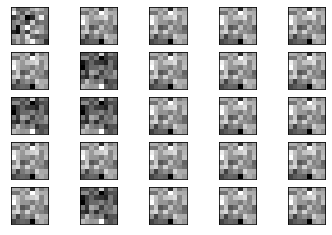

In [143]:
if show:
    plt.figure(4)
    num_of_atoms_to_show = 25
    for i in range(num_of_atoms_to_show):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(D_smallest_25_std_dev[:,i].reshape(8, 8), cmap='gray')
    plt.show()